# 1. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import time
np.random.seed(10)

# 資料預處理

讀取mnist資料

In [ ]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

將features 轉換為4維矩陣

In [ ]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

將features 標準化

In [ ]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

labal 以onehot encoding轉換

In [ ]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

匯入模組

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

建立keras的sequential

In [ ]:
model = Sequential()

建立卷積層1

In [ ]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

建立池化層1

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

建立卷積層2

In [ ]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

建立池化層2

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

加入Dropout 避免overfitting

In [ ]:
model.add(Dropout(0.25))

建立神經網路(平坦層、隱藏層、輸出層)


建立平坦層

In [ ]:
model.add(Flatten())

建立隱藏層

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

建立輸出層

In [ ]:
model.add(Dense(10,activation='softmax'))

查看模型

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 36)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1764)             

# 訓練模型

定義訓練

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',metrics=['accuracy']) 

開始訓練

In [ ]:
t0 = time.time()
train_history=model.fit(x=x_Train4D_normalize, 
            y=y_TrainOneHot,validation_split=0.2, 
            epochs=100, batch_size=300,verbose=2)
print(time.time()-t0)

Epoch 1/100
160/160 - 2s - loss: 2.2090 - accuracy: 0.2070 - val_loss: 1.8865 - val_accuracy: 0.7137 - 2s/epoch - 14ms/step
Epoch 2/100
160/160 - 1s - loss: 1.4611 - accuracy: 0.5395 - val_loss: 0.6792 - val_accuracy: 0.8520 - 1s/epoch - 7ms/step
Epoch 3/100
160/160 - 1s - loss: 0.8479 - accuracy: 0.7296 - val_loss: 0.4131 - val_accuracy: 0.8976 - 1s/epoch - 9ms/step
Epoch 4/100
160/160 - 1s - loss: 0.6316 - accuracy: 0.8053 - val_loss: 0.3117 - val_accuracy: 0.9183 - 1s/epoch - 8ms/step
Epoch 5/100
160/160 - 1s - loss: 0.5149 - accuracy: 0.8426 - val_loss: 0.2576 - val_accuracy: 0.9309 - 1s/epoch - 8ms/step
Epoch 6/100
160/160 - 1s - loss: 0.4430 - accuracy: 0.8655 - val_loss: 0.2253 - val_accuracy: 0.9383 - 1s/epoch - 7ms/step
Epoch 7/100
160/160 - 1s - loss: 0.3979 - accuracy: 0.8804 - val_loss: 0.2012 - val_accuracy: 0.9442 - 1s/epoch - 7ms/step
Epoch 8/100
160/160 - 1s - loss: 0.3552 - accuracy: 0.8947 - val_loss: 0.1831 - val_accuracy: 0.9486 - 1s/epoch - 7ms/step
Epoch 9/100
160

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

畫出訓練結果

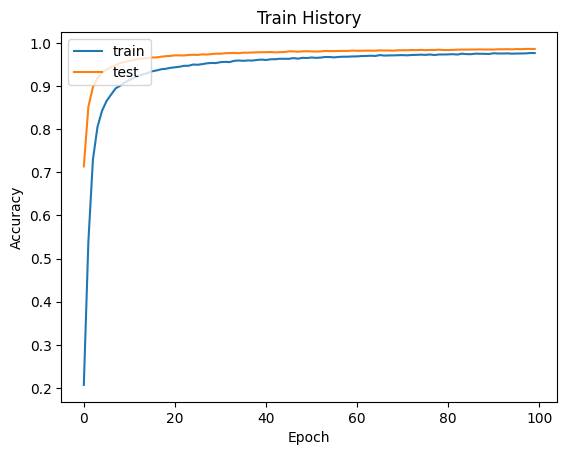

In [ ]:
show_train_history('accuracy','val_accuracy')

畫出loss誤差執行結果

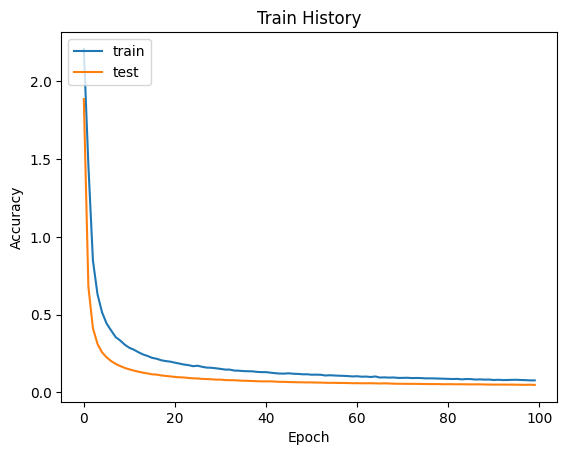

In [ ]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9887


0.9886999726295471

# 預測結果

In [ ]:
prediction= np.argmax(model.predict(x_Test),axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

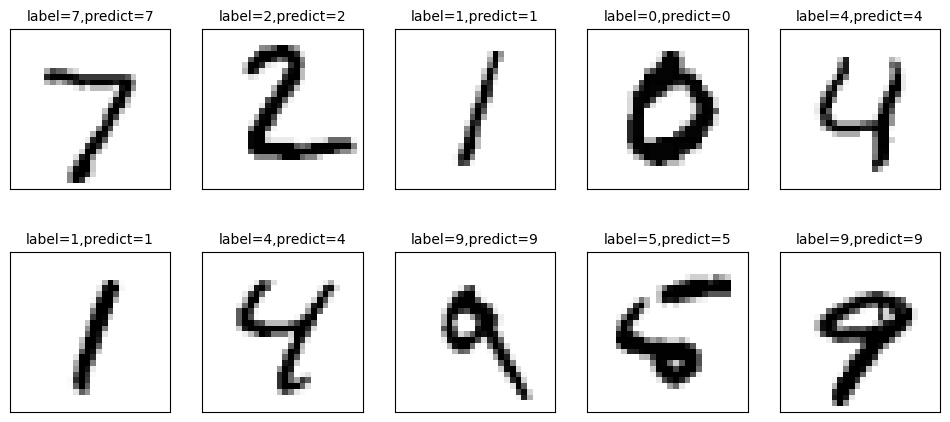

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [ ]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1130,2,0,0,0,1,1,1,0
2,2,1,1025,0,0,0,0,3,1,0
3,1,0,3,993,0,4,0,6,3,0
4,0,0,1,0,978,0,2,1,0,0
5,2,1,0,2,0,882,3,1,1,0
6,5,2,0,0,2,3,945,0,1,0
7,1,4,6,1,0,0,0,1014,1,1
8,7,0,3,2,2,0,1,2,954,3


In [ ]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2035,5,3
